#Carregando libs

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import cycle
import pylab as pl
sns.set_palette('husl')
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
import pickle

##Carregando e plotando base de dados

In [108]:
#Carrega data set
dataset = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urlretrieve(dataset)
iris = pd.read_csv(dataset, sep=',')
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
iris.columns = attributes

#Imprimindo as 5 primeiras linhas do dataset
print(iris.head(5))
#informações sobre o dataFrame
print(iris.info())
#Observando as informações contidas no DataFrame
print(iris.describe())
# Todas as chaves associadas ao dicionário são exibidas como uma lista.
print('Chaves associados ao dicionário: ',iris.keys())
#Verifique se há valores ausentes.
print('Valores ausentes : ', iris.isnull().values.any())
# Verificando as espécies que serão preditas
print('Especies :', '\n', iris['class'].value_counts())

# Extraindo as características que definem a flor iris(nome de cada um dos features)
X = iris.drop(columns="class")
#print(x_temp)
feature_names = X.columns
Y = iris["class"]
labels = Y.unique()

# nome de cada um dos features
print('Caracteristicas : ',feature_names)

   sepal_length  sepal_width  petal_length  petal_width        class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    149.000000   149.000000    149.000000   149.000000
mean

#Visualização dos dados

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


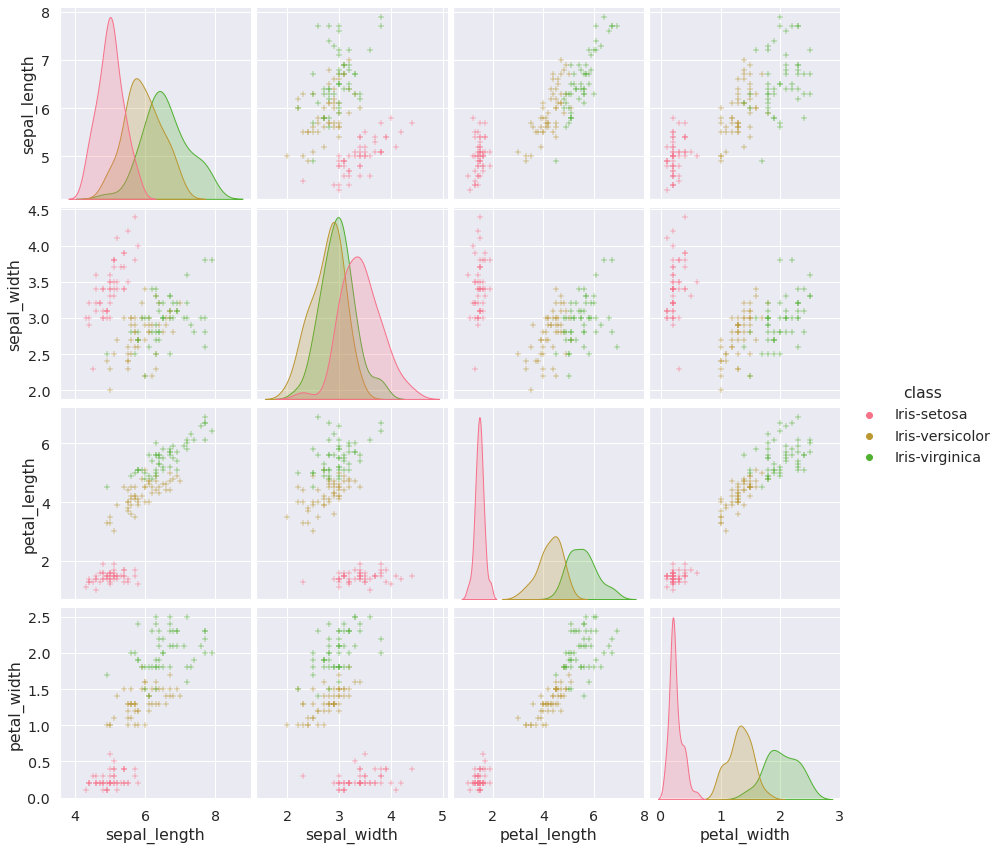

In [109]:
import seaborn as sns
sns.set_palette('husl')

b = sns.pairplot(iris,hue="class",diag_kind="kde", markers='+',size =3 );
plt.show()

Gráfico com a representação da distribuição de pares de características da base de dados. Em rosa são visíveis as características relacionadas a íris-setosa, em marrom é representado as características da íris-versicolor  e em verde as características da iris-virginica.

##Gráfico de Violino para cada uma das Características (feature_names)
O gráfico abaixo mostra a distribuição de dados quantitativos em vários níveis das três variáveis ​​categóricas(Espécies de Flor) contidas na base de dados, de forma que essas distribuições podem ser comparadas. Ao contrário de um gráfico de caixa, no qual todos os componentes do gráfico correspondem a pontos de dados reais, o gráfico de violino apresenta uma estimativa da densidade do kernel da distribuição subjacente. É possível visualizar no gráfico que as regiões mais densas dos dados são mais grossas e mais esparsas.


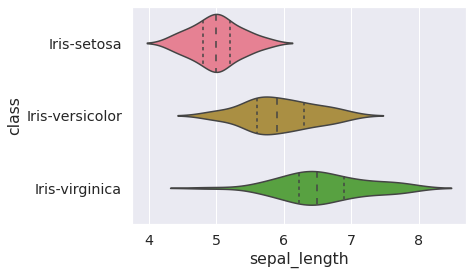

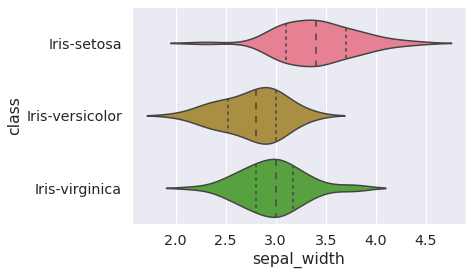

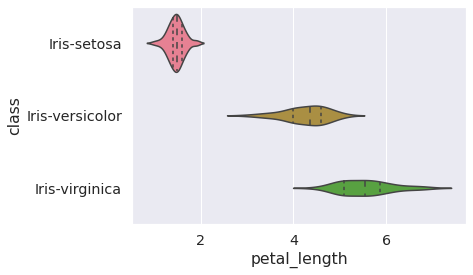

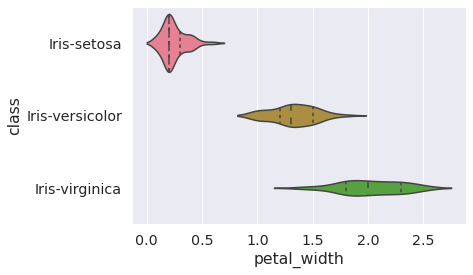

In [110]:
g = sns.violinplot(y='class', x='sepal_length', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='sepal_width', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='petal_length', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='petal_width', data=iris, inner='quartile')
plt.show()

#Dividindo o conjunto de dados

In [111]:
# Number of examples
data = iris.iloc[:, :-1].values
target = iris.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split (data, target,  train_size = 0.80, test_size = 0.20, random_state = 1)


##Visualizando os dados
A melhor forma de inspecionarmos os dados e visualizá-los. Para fazer isso, utilizaremos a biblioteca Matplotlib para gerar um gráfico de dispersão(Scatter plot). Isso nos permitirá verificar se os dados de medição das pétalas e sépalas estão bem distribuídos.


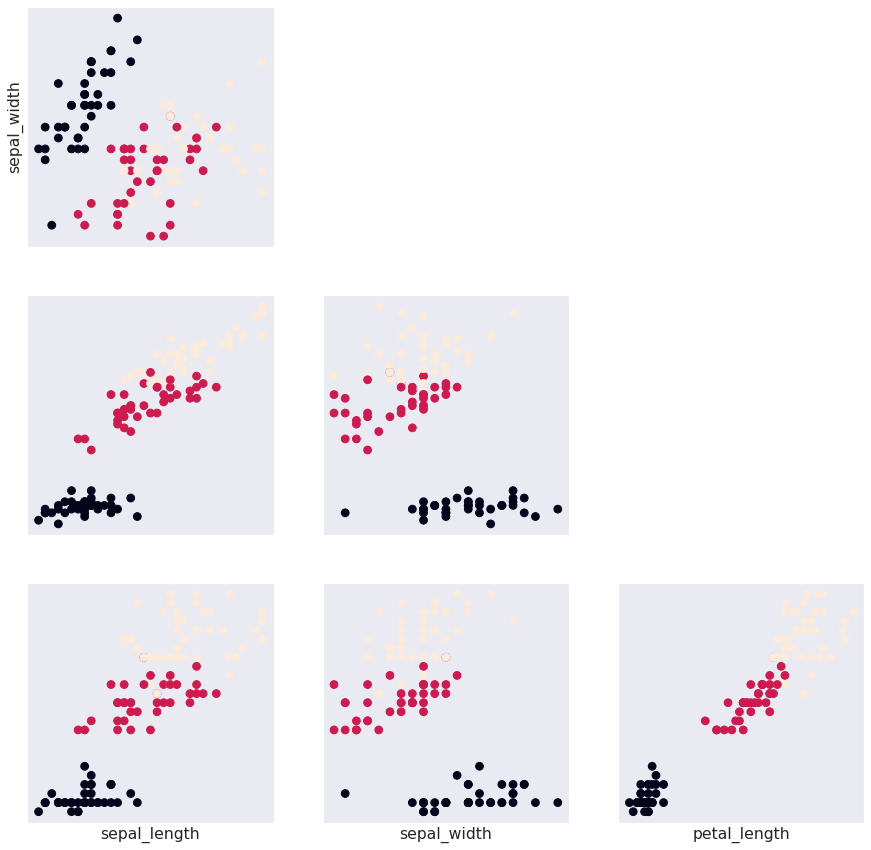

In [112]:
# Preparando os dados para serem plotados
y_q = []
for i, numeros in enumerate(y_train):
  if numeros == 'Iris-setosa':
    y_q.append(0)
  elif numeros == 'Iris-versicolor':
    y_q.append(1)
  elif numeros == 'Iris-virginica':
    y_q.append(2)    
#plotando os dados de treino e teste    
fig, ax = plt.subplots(3,3, figsize=(15,15))
for i in range(3):
  for j in range(3):
    ax[i,j].scatter(X_train[:,j], X_train[:, i+1], c = y_q, s =60)
    ax[i,j].set_xticks(())
    ax[i,j].set_yticks(())

    if i ==2:
      ax[i,j].set_xlabel(feature_names[j])
    if i == 0:
      ax[i,j].set_ylabel(feature_names[i+1])
    if j > i:
      ax[i,j].set_visible(False)  

Como podemos ver no gráfico, os dados parecem estar muito bem distribuídos. Isso permitirá uma precisão maior do modelo, uma vez que as informações são bem variadas para cada tipo de Íris. Imagine, por exemplo, se as flores da espécie Setosa tivessem as mesmas medidas da Versicolor. Isso faria com que nosso modelo tivesse dificuldades em prever novas flores inseridas mais tarde.

##Treinando o modelo

In [113]:
classifier = DecisionTreeClassifier().fit(X_train, y_train)

y_pred = classifier.predict(X_test)

##Diagrama da Árvore gerada
O diagrama abaixo mostra claramente como o algoritmo se comportou. Aqui, a primeira divisão é baseada no comprimento da pétala, sendo menor que 2.45 cm sendo identificado como Íris-setosa, enquanto aqueles com maior sendo classificados como Íris-virginica. No entanto, uma divisão posterior ocorre para aqueles com comprimento de pétala maior do que 2.45, com duas divisões adicionais para terminar com classificações finais mais precisas.
 
Obviamente, não estamos apenas interessados em como ele foi executado nos dados de treinamento, mas em quão bem ele executou nos dados de teste invisíveis. Isso significa que temos que usá-lo para prever a classe a partir dos valores de teste, o que é feito usando o método predict ().


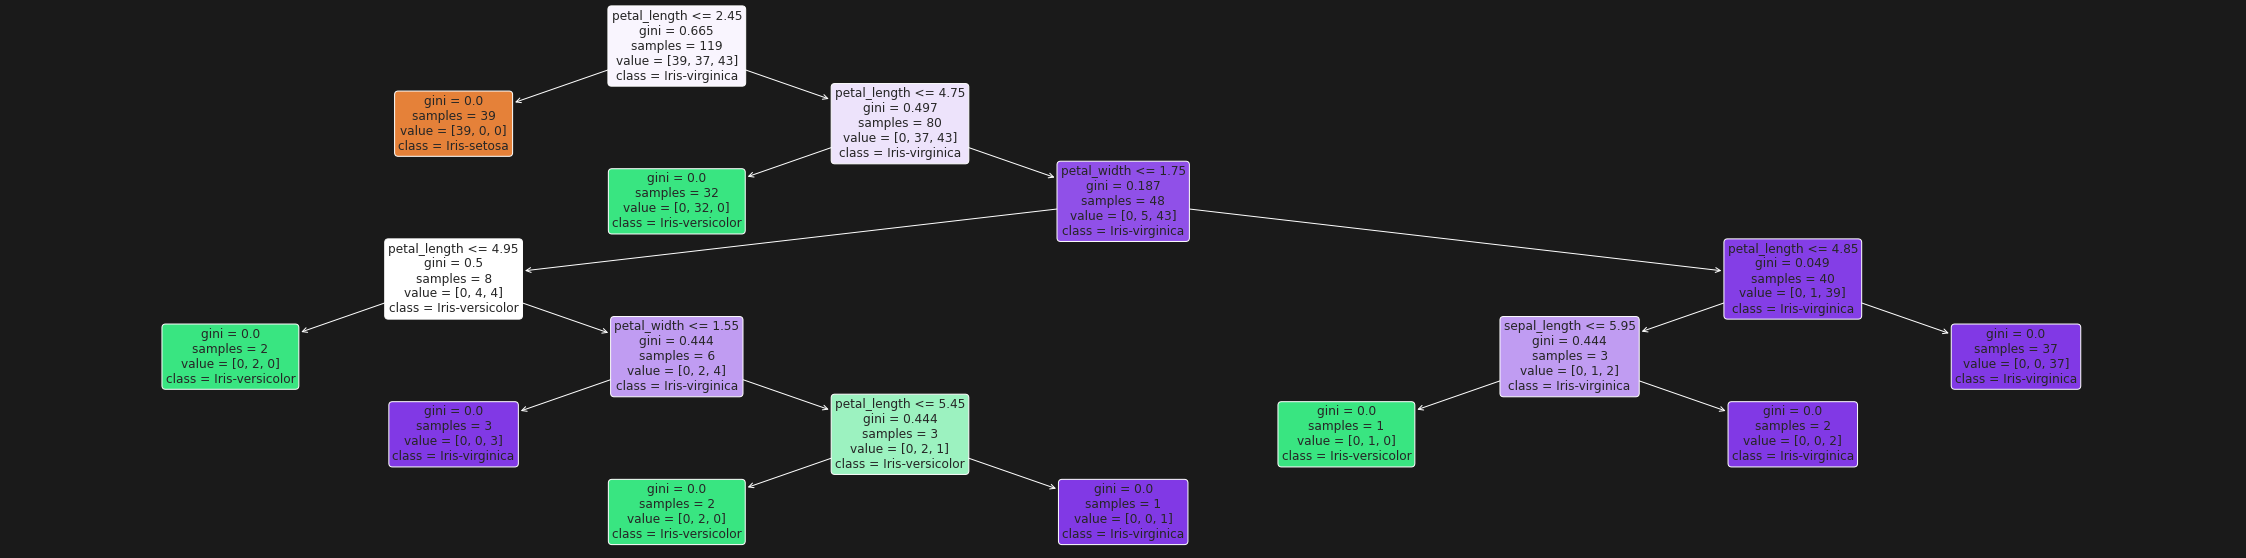

In [114]:
plt.figure(figsize = (40,10), facecolor ='K')
plot_tree(classifier, feature_names = feature_names, class_names= labels, rounded = True, filled=True)
# Display the tree plot figure.
plt.show()

##Matriz de Confusão
 
Estamos interessados em saber como isso funciona em termos de verdadeiros positivos (verdadeiros previstos e são verdadeiros), falsos positivos (verdadeiros previstos, mas não são verdadeiros), falsos negativos (falsos previstos, mas na verdade são verdadeiros) e negativos verdadeiros (falsos previstos e são realmente falsos) .
 
Uma maneira de fazer isso é examinar os resultados em uma matriz de confusão. Uma matriz de confusão nos permite visualizar como os rótulos preditos e que são realmente verdadeiros combinam, mostrando os valores preditos em um eixo e os valores reais no outro. Isso é útil para identificar onde podemos obter falsos positivos ou falsos negativos e, portanto, como o algoritmo foi executado.


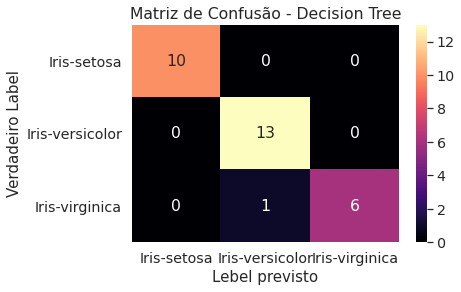

<Figure size 1440x720 with 0 Axes>

In [115]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
## transforme a confusion_matrix em um dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plote o resultado de matrix_df
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(20,10))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Matriz de Confusão - Decision Tree')
ax.set_xlabel("Lebel previsto", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("Verdadeiro Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

Como pode ser visto aqui, a partir dos dados não vistos, apenas um valor falhou em ser previsto da classe Iris-verginica, o que sugere que, de modo geral, esse algoritmo se saiu bem na previsão de dados não vistos.

##Medindo o desempenho do modelo
Para medir o desempenho, foram usadas as métricas a seguir:


*   Acurácia


*   Precisão


*   Recall


*   f1-Score


In [116]:
# Resumo das previsões feitas pelo classificador
print(classification_report(y_test, y_pred))
# Pontuação de precisão
print('Acurácia do modelo é',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.98      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30

Acurácia do modelo é 0.9666666666666667


#Salvando o modelo treinado

In [117]:
DecisionTrees = open("/DecisionTrees.p", "wb")
pickle.dump(classifier, DecisionTrees)
#pickle.dump(history, DecisionTrees)
DecisionTrees.close()

## Desenvolvimento do classificador

Abaixo é possível verificar como o classificador se comporta com o modelo salvo para esse conjunto de dados .
Uma amostra do tipo Iris-Setosa foi estabelecida aleatoriamente para teste do classificador :

    - Com as seguintes características: 5, 2.9, 1, 0.2

Obs.:  A amostra utilizada para teste do classificador foi gerada aleatoriamente observando-se o comportamento das amostras, ela não está presente no conjunto de amostras utilizadas no treinamento e nem nas amostras de teste.


In [118]:
def classifier_decisionTrees(x_test , _path_library):
    """
        Classifier of Decision Trees
        :. x_test - Dados de predição
        :. _path_library - Modelo Treinado

    """
    y_pred = _path_library.predict(x_test)
    #y = np.argmax(y_pred ,axis=1)
    
    
    return y_pred

#Abrindo o modelo salvo
path_library = open( '/DecisionTrees.p',  'rb')
#Carregando o modelo salvo
modelo = pickle.load(path_library)
#amostra de teste do tipo setosa
amostras_de_teste = np.array([[5, 2.9, 1, 0.2]])
#Executando o classificador
y_pred = classifier_decisionTrees(amostras_de_teste, modelo)


print("Saída do classificador: ", y_pred)

Saída do classificador:  ['Iris-setosa']


Na saída do classificador é possível observar que foi realizada a classificação correta da amostra fornecida.